<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">FINAL LAB PROJECT</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">Course: Programming for Data Science</div>


![image.png](https://cdn.prod.website-files.com/63ccf2f0ea97be12ead278ed/644a18b637053fa3709c5ba2_what-is-data-science-p-1080.jpg)


<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>TABLE OF CONTENTS📝</b></h3>
    
   * [1. Data Collection](#1)
        - [1.1 Overview](#1.1)
        - [1.2 License](#1.2)
        - [1.3 Data Collection Methods](#1.3)

   * [2. Data Exploration](#2)
        - [2.1 Data Loading](#2.1)
        - [2.2 Data Overview ](#2.2)
        - [2.3 Data Distributions ](#2.3)
 

   * [3. Question Formulation anf Data Analysis](#3)
        - [3.1 Question 1](#3.1)
        - [3.2 Question 2](#3.2)
        - [3.3 Question 3](#3.2)

<a id="1"></a> 
# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">1. Data Collection</div>

### ***1.1 Overview***
**Dataset Source:**
[Remote Work & Mental Health Dataset on Kaggle](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health?fbclid=IwY2xjawFrSKZleHRuA2FlbQIxMAABHeONLRrPuU1AbC_pHea8QyWNYYMqW-t0Tw_xZtxvDGbldU1ypWS0-AzKKg_aem_jAr-PidmQqlOTGowulNZBA)

🌿 This dataset examines the impact of remote work on employees' mental well-being. It focuses on how different work arrangements may influence stress levels, work-life balance, and mental health conditions. 

📈 Our analysis aims to:
 - Address key questions regarding the increasing prevalence of remote work and its effects across industries and regions, 
 - Offer actionable insights for researchers, HR professionals, and businesses to evaluate its impact on productivity and employee well-being.
 - Highlight the importance of prioritizing mental health in organizational policies and practices.

### ***1.2 License***
This dataset has `Apache 2.0` license. As a result, we can do anything with this dataset

### ***1.3 Data Collection Methods***

#### Sources

The dataset draws from a variety of sources to ensure a comprehensive understanding of the relationship between remote work and mental health. It incorporates responses from surveys distributed across social media platforms, professional networks, and online forums. These diverse channels helped capture a wide range of experiences and perspectives, enriching the dataset with valuable insights.

#### Collection Methodology

Data collection involved designing a structured questionnaire that included both quantitative and qualitative questions. The survey was distributed digitally, allowing respondents to share their experiences regarding remote work's impact on their mental well-being. Responses were anonymized to maintain privacy, ensuring participants felt comfortable providing honest feedback. This methodology enables a thorough analysis of the mental health challenges and benefits associated with remote work environments.

<a id="2"></a> 
# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">Data Exploration</div>

### ***2.1 Data Loading***

### 👉 Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 👉 Read csv file into a Pandas Dataframe and print the first 5 rows of the Dataframe

In [2]:
path= './data/Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(path)
df.head()


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


### ***2.2 Data Overview*** 

### 👉 Check the number of rows and columns.

In [3]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 5000
Number of columns: 20


### 👉  Check the number of duplicated rows


In [4]:
have_duplicate_rows = bool(df.duplicated().any())
print(have_duplicate_rows)

False


### 👉 Inspect the data types for each column

In [5]:
col_dtype = df.dtypes
print(col_dtype)

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object


### ***2.3 Data Distributions***

### 👉 Ý nghĩa và phân bố giá trị của từng cột

##### hàm hiển thị phân bố cho các cột có kiểu dữ liệu là object

In [6]:
def Display_int64(name_col):
    print("All value:", df[name_col].count()  )
    print("Empty value:",  df[name_col].isna().sum())
    print(f"Average {name_col}:", df[name_col].mean()  )
    print(f"Median {name_col}: ", df[name_col].median())
    print(f"Max {name_col}:", df[name_col].max())
    print(f"Min {name_col}:", df[name_col].min())

####  hàm hiển thị phân bố cho các cột có dữ liệu là int64

In [7]:
def Display_object(name_col, name_plot):
    print("All value:", df[name_col].count())
    print("Empty value:", df[name_col].isna().sum())
    
    plt.figure(figsize=(4, 4))
    plt.pie(
        df[name_col].value_counts().values , 
        labels= df[name_col].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors,
        textprops={'fontsize': 10}
    )
    plt.title(name_plot, fontsize=12 , color = 'blue')
    plt.axis('equal')  
    plt.show()

#### **Employee_ID**  :  
Each employee has a unique ID

In [8]:
Employee_ID = set(df['Employee_ID'].to_list())
print('Number employee:',len(Employee_ID))

Number employee: 5000


#### **Age**: 
Falls within the range of 22 to 60.

In [9]:
Age = set(df['Age'].to_list())
print('Distinct value:',Age)
Display_int64('Age')

Distinct value: {22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
All value: 5000
Empty value: 0
Average Age: 40.995
Median Age:  41.0
Max Age: 60
Min Age: 22


#### **Gender**: 
- Prefer not to say
- Male
- Non - binary
- Female

Distinct value: {'Prefer not to say', 'Non-binary', 'Male', 'Female'}
All value: 5000
Empty value: 0


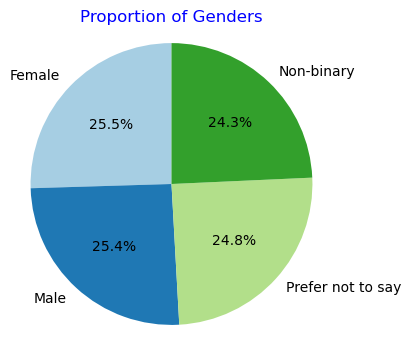

In [10]:
Gender = set(df['Gender'].to_list())
print('Distinct value:',Gender)
Display_object('Gender', 'Proportion of Genders')

#### **Job_role**: 
- HR
- Data Scientist
- Sales
- Designer
- Project Manager 
- Software Engineer
- Marketing

Distinct value: {'HR', 'Software Engineer', 'Data Scientist', 'Sales', 'Project Manager', 'Designer', 'Marketing'}
All value: 5000
Empty value: 0


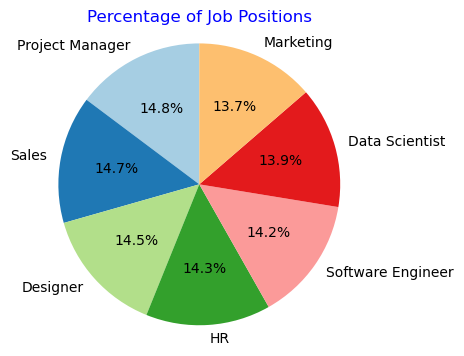

In [11]:
Job_Role = set(df['Job_Role'].to_list())
print('Distinct value:',Job_Role )
Display_object('Job_Role', 'Percentage of Job Positions')

#### **Industry**:
- Education
- Manufacturing
- IT
- Retail
- Finance
- Healthcare
- Consulting

Distinct value: {'Finance', 'Consulting', 'Manufacturing', 'Healthcare', 'Education', 'Retail', 'IT'}
All value: 5000
Empty value: 0


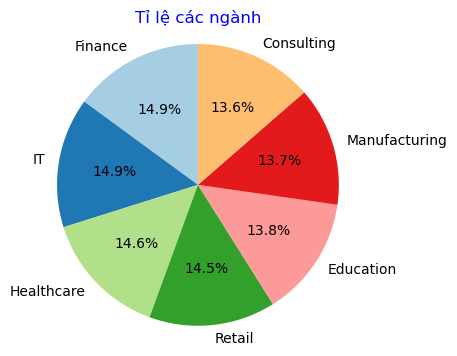

In [12]:
Industry = set(df['Industry'].to_list())
print('Distinct value:',Industry)
Display_object('Industry','Tỉ lệ các ngành')

#### **Years_of_Experience**: 
Ranges from 1 to 35

In [13]:
Years_of_Experience = set(df['Years_of_Experience'].to_list())
print('Distinct value:',Years_of_Experience)
Display_int64('Years_of_Experience')

Distinct value: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}
All value: 5000
Empty value: 0
Average Years_of_Experience: 17.8102
Median Years_of_Experience:  18.0
Max Years_of_Experience: 35
Min Years_of_Experience: 1


#### **Work_Location**: 
- Remote
- Onsite
- Hybrid

Distinct value: {'Remote', 'Hybrid', 'Onsite'}
All value: 5000
Empty value: 0


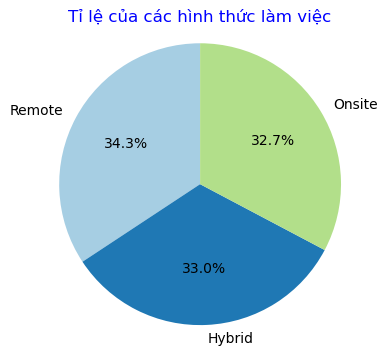

In [14]:
Work_Location = set(df['Work_Location'].to_list())
print('Distinct value:',Work_Location)
Display_object('Work_Location','Tỉ lệ của các hình thức làm việc')

#### **Hours_Worked_Per_Week**: số giờ làm việc trong tuần(int64)
- Phân bố trong khoảng từ 20 tới 60

In [15]:
Hours_Worked_Per_Week = set(df['Hours_Worked_Per_Week'].to_list())
print('Distinct value:',Hours_Worked_Per_Week)
Display_int64('Hours_Worked_Per_Week')

Distinct value: {20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
All value: 5000
Empty value: 0
Average Hours_Worked_Per_Week: 39.6146
Median Hours_Worked_Per_Week:  40.0
Max Hours_Worked_Per_Week: 60
Min Hours_Worked_Per_Week: 20


#### **Number_of_Virtual_Meetings**: số lượng cuộc họp online(int64)
- Phân bố trong khoảng từ 0 tới 15

In [16]:
Number_of_Virtual_Meetings = set(df['Number_of_Virtual_Meetings'].to_list())
print('Distinct value:',Number_of_Virtual_Meetings)
Display_int64('Number_of_Virtual_Meetings')

Distinct value: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
All value: 5000
Empty value: 0
Average Number_of_Virtual_Meetings: 7.559
Median Number_of_Virtual_Meetings:  8.0
Max Number_of_Virtual_Meetings: 15
Min Number_of_Virtual_Meetings: 0


#### **Work_Life_Balance_Rating**: Xếp hạng cân bằng giữa công việc và cuộc sống(int64)
- Phân bố trong khoảng từ 1 tới 5


In [17]:
Work_Life_Balance_Rating = set(df['Work_Life_Balance_Rating'].to_list())
print('Distinct value:',Work_Life_Balance_Rating)
Display_int64('Work_Life_Balance_Rating')

Distinct value: {1, 2, 3, 4, 5}
All value: 5000
Empty value: 0
Average Work_Life_Balance_Rating: 2.9842
Median Work_Life_Balance_Rating:  3.0
Max Work_Life_Balance_Rating: 5
Min Work_Life_Balance_Rating: 1


#### **Stress_Level**: mức độ căng thẳng:
- Low
- Medium
- High

Distinct value: {'Low', 'High', 'Medium'}
All value: 5000
Empty value: 0


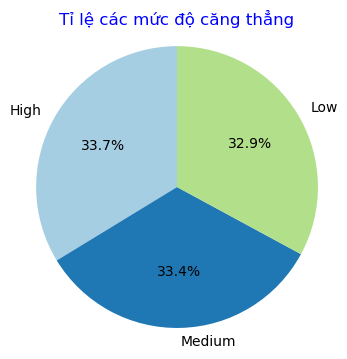

In [18]:
Stress_Level = set(df['Stress_Level'].to_list())
print('Distinct value:',Stress_Level)
Display_object('Stress_Level','Tỉ lệ các mức độ căng thẳng')

#### **Mental_Health_Condition**:  tình trạng sức khỏe tinh thần:
- nan (không có vấn đề gì)
- Burnout (kiệt sức)
- Anxiety (lo lắng)
- Depression (trầm cảm)

Distinct value: {'None', 'Depression', 'Burnout', 'Anxiety'}
All value: 5000
Empty value: 0


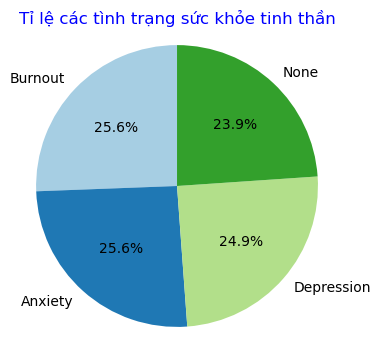

In [19]:
Mental_Health_Condition = set(df['Mental_Health_Condition'].to_list())
print('Distinct value:',Mental_Health_Condition)
Display_object('Mental_Health_Condition','Tỉ lệ các tình trạng sức khỏe tinh thần')

#### **Access_to_Mental_Health_Resources**: có tiếp cận vào tài liệu sức khỏe tinh thần:
- No
- Yes

Distinct value:

 {'Yes', 'No'}
All value: 5000
Empty value: 0


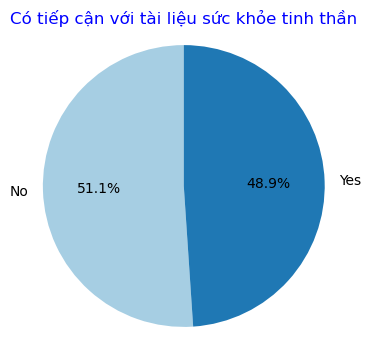

In [20]:
Access_to_Mental_Health_Resources = set(df['Access_to_Mental_Health_Resources'].to_list())
print('Distinct value:',Access_to_Mental_Health_Resources)
Display_object('Access_to_Mental_Health_Resources','Có tiếp cận với tài liệu sức khỏe tinh thần')

#### **Productivity_Change**: Sự thay đổi về năng xuất làm việc:
- Increase
- Decrease
- No Change

All distinct value: {'Increase', 'No Change', 'Decrease'}
All value: 5000
Empty value: 0


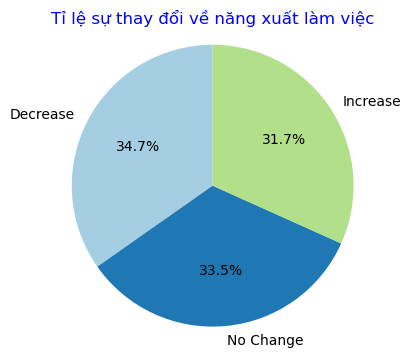

In [21]:
Productivity_Change = set(df['Productivity_Change'].to_list())
print('All distinct value:',Productivity_Change)
Display_object('Productivity_Change','Tỉ lệ sự thay đổi về năng xuất làm việc')

#### **Social_Isolation_Rating**: Mức độ tách biệt xã hội(int 64)
- Phân bố trong khoảng từ 1 tới 5


In [22]:
Social_Isolation_Rating = set(df['Social_Isolation_Rating'].to_list())
print('All distinct value:',Social_Isolation_Rating)
Display_int64('Social_Isolation_Rating')

All distinct value: {1, 2, 3, 4, 5}
All value: 5000
Empty value: 0
Average Social_Isolation_Rating: 2.9938
Median Social_Isolation_Rating:  3.0
Max Social_Isolation_Rating: 5
Min Social_Isolation_Rating: 1


#### **Satisfaction_with_Remote_Work**: Mức độ hài lòng với kiểu làm việc từ xa
- Satisfied (hài lòng)
- Neutral  (trung lập)
- Unsatisfied (không hài lòng)

All distinct value: {'Neutral', 'Unsatisfied', 'Satisfied'}
All value: 5000
Empty value: 0


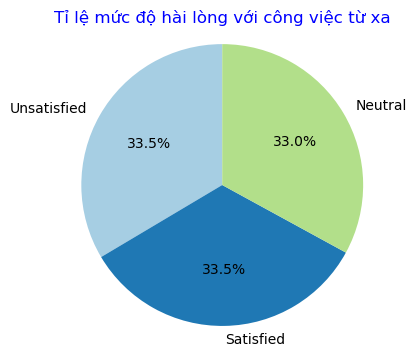

In [23]:
Satisfaction_with_Remote_Work = set(df['Satisfaction_with_Remote_Work'].to_list())
print('All distinct value:',Satisfaction_with_Remote_Work)
Display_object('Satisfaction_with_Remote_Work','Tỉ lệ mức độ hài lòng với công việc từ xa')

#### **Company_Support_for_Remote_Work**: Mức độ hỗ trợ của công ty cho kiểu làm việc từ xa(int64)
- Phân bố trong khoảng từ 1 tới 5


In [24]:
Company_Support_for_Remote_Work = set(df['Company_Support_for_Remote_Work'].to_list())
print('Distinct value:',Company_Support_for_Remote_Work)
Display_int64('Company_Support_for_Remote_Work')

Distinct value: {1, 2, 3, 4, 5}
All value: 5000
Empty value: 0
Average Company_Support_for_Remote_Work: 3.0078
Median Company_Support_for_Remote_Work:  3.0
Max Company_Support_for_Remote_Work: 5
Min Company_Support_for_Remote_Work: 1


#### **Physical_Activity**: tham gia các hoạt động thể chất :
- nan (không tham gia)
- Weekly (hằng tuần)
- Daily (hằng ngày)

Distinct value: {'Weekly', 'None', 'Daily'}
All value: 5000
Empty value: 0


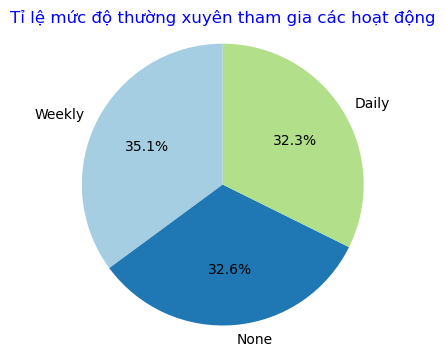

In [25]:
Physical_Activity = set(df['Physical_Activity'].to_list())
print('Distinct value:',Physical_Activity)
#fill nan with No
df['Physical_Activity'] = df['Physical_Activity'].fillna('No')  
Display_object('Physical_Activity','Tỉ lệ mức độ thường xuyên tham gia các hoạt động')

#### **Sleep_Quality**: chất lượng giấc ngủ:
- Poor (không tốt)
- Average (trung bình)
- Good (tốt)

Distinct value: {'Average', 'Poor', 'Good'}
All value: 5000
Empty value: 0


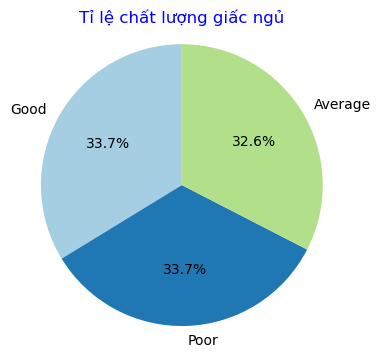

In [26]:
Sleep_Quality = set(df['Sleep_Quality'].to_list())
print('Distinct value:',Sleep_Quality)
Display_object('Sleep_Quality','Tỉ lệ chất lượng giấc ngủ')

#### **Region**: Khu vực quốc gia :
- North America (Bắc Mỹ)
- Oceania (Châu Đại Dương)
- Asia (Châu Á)
- Europe (Châu Âu)
- South America (Nam Mỹ)
- Africa (Châu Phi)

Distinct value: {'Africa', 'Oceania', 'North America', 'South America', 'Asia', 'Europe'}
All value: 5000
Empty value: 0


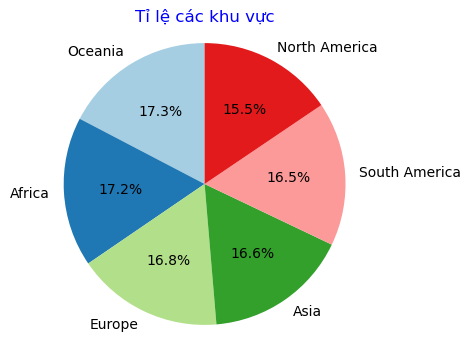

In [27]:
Region = set(df['Region'].to_list())
print('Distinct value:',Region)
Display_object('Region','Tỉ lệ các khu vực')

**💡Nhận xét:**
- Trong cùng 1 cột: dữ liệu được phân bố khá là đồng đều (dễ nhìn thấy thì mean với average gần bằng nhau)
-
-
-


<a id="3"></a> 
# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">3. Question Formulation and Analysis</div>

### ***3.1 Question 1***


#### <span style='color:#2B9C15 '>💬 Question </span>

**Which industry reported the highest levels of remote work satisfaction among remote employees?**

#### <span style='color:#2B9C15 '>🔎 What are the benefits of finding the answer? </span>

**Finding the industry with the highest remote work satisfaction can reveal successful strategies and policies. These insights can serve as a model for other industries to enhance their remote work environments and improve employee happiness.**

#### <span style='color:#2B9C15 '>📉 Data analysis ideas </span>

- Retrieve a subset of the data containing only remote workers and named `remote_workers`
- *Satisfied workers* are who reported that they were `satisfied` with remote work
- For each industry, the satisfaction percentage is evaluated using the formula

$$
    \text{satisfaction percentage} = \dfrac{\text{number of satisfied workers}}{\text{total number of workers}}.100 \ \ (\%)
$$

$\rightarrow$ Use the `groupby` function with appropriate aggregations in `pandas`

In [ ]:
# Retrieve the subsets
remote_workers = df.loc[df.Work_Location == 'Remote', :] 
satisfaction = remote_workers.loc[:, ['Industry', 'Satisfaction_with_Remote_Work']]
satisfied_remote_workers = satisfaction[satisfaction['Satisfaction_with_Remote_Work'] == 'Satisfied']

In [ ]:
# Calculate the percentage
ans = satisfied_remote_workers.groupby('Industry').count() / satisfaction.groupby('Industry').count()  * 100

# Sort values and normalize structure
ans = ans.sort_values(by=ans.columns[0], ascending=True)[ans.columns[0]]
ans

Industry
Healthcare       26.190476
IT               28.451883
Finance          29.182879
Retail           29.795918
Manufacturing    31.007752
Education        32.773109
Consulting       35.111111
Name: Satisfaction_with_Remote_Work, dtype: float64

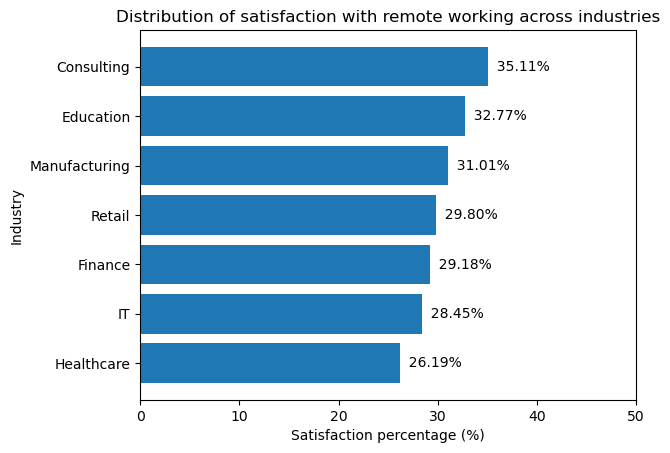

In [ ]:
# visulize the result

disp_plot = plt.barh(ans.index, ans.values)
plt.bar_label(disp_plot, fmt= lambda x: f'  {x:.2f}%')
plt.title('Distribution of satisfaction with remote working across industries')
plt.xlabel('Satisfaction percentage (%)')
plt.ylabel('Industry')
plt.xlim((0, 50))
plt.show()

#### <span style='color:#2B9C15 '>💡 Observation </span>

<div style="border-radius:10px;border:#2B9C15  solid;padding: 15px;background-color:#F5F9D0;font-size:110%;text-align:left">

We can see that the **Consulting** industry has the highest satisfaction with remote working. HR and executives can adopt its practices to enhance employee experiences.

### ***3.2 Question 2***

#### <span style='color:#2B9C15 '>💬 Question </span>

How do working hours correlate with social isolation ratings across different industry?

#### <span style='color:#2B9C15 '>🔎 What are the benefits of finding the answer? </span>
This analysis provides industry-specific insights and examines whether the trends are consistent across sectors. Understanding the correlation between working hours and social isolation helps policy-makers organizations identify patterns and implement targeted strategies to mitigate isolation effectively.

#### <span style='color:#2B9C15 '>📉 Data analysis ideas </span>
- Use box plot to visualize the distribution of working hours across industries and observe how social isolation ratings vary across different industries.  
- Use heatmap to show the average social isolation rating for each industry at varying working hour levels. This can ighlight correlations or trends between working hours and isolation ratings.  
- Use depict the distribution of social isolation ratings within industries, segmented by working hour bins

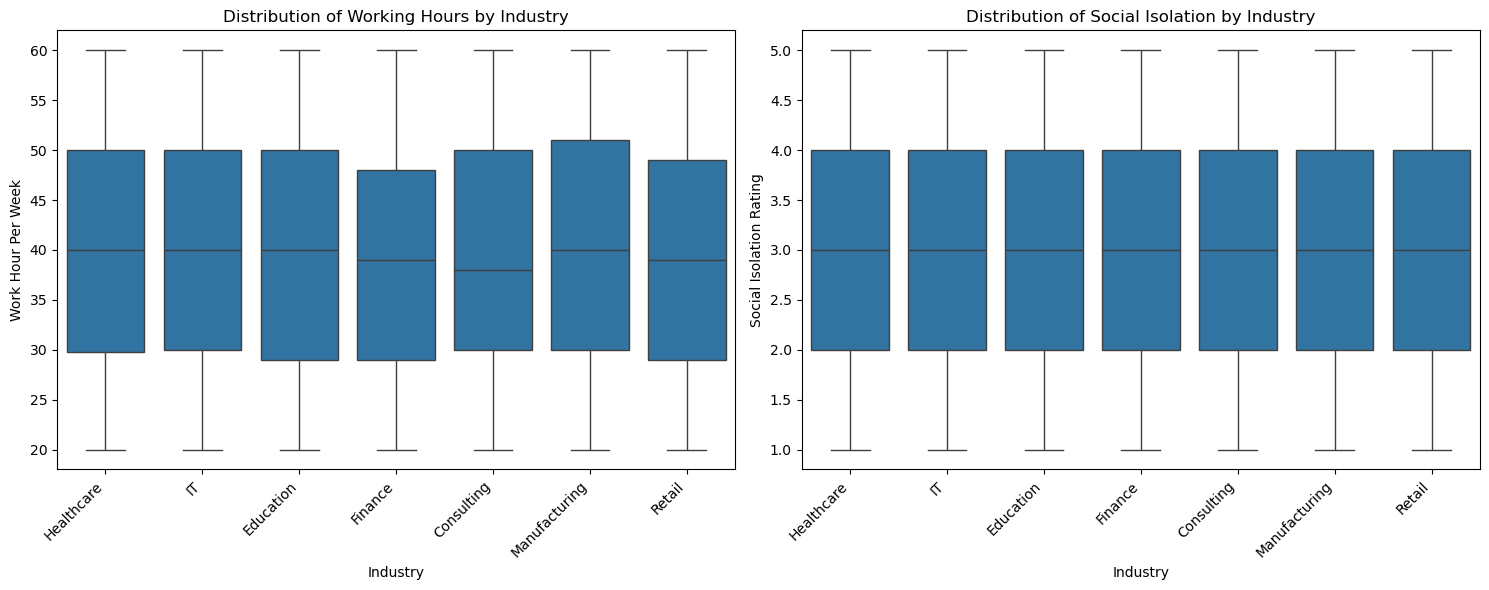

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df, x='Industry', y='Hours_Worked_Per_Week', ax=ax1)
ax1.set_title('Distribution of Working Hours by Industry')
ax1.set_xticks(range(len(df['Industry'].unique())))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel('Work Hour Per Week')

sns.boxplot(data=df, x='Industry', y='Social_Isolation_Rating', ax=ax2)
ax2.set_title('Distribution of Social Isolation by Industry')
ax2.set_xticks(range(len(df['Industry'].unique())))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel('Social Isolation Rating')

plt.tight_layout()
plt.show()


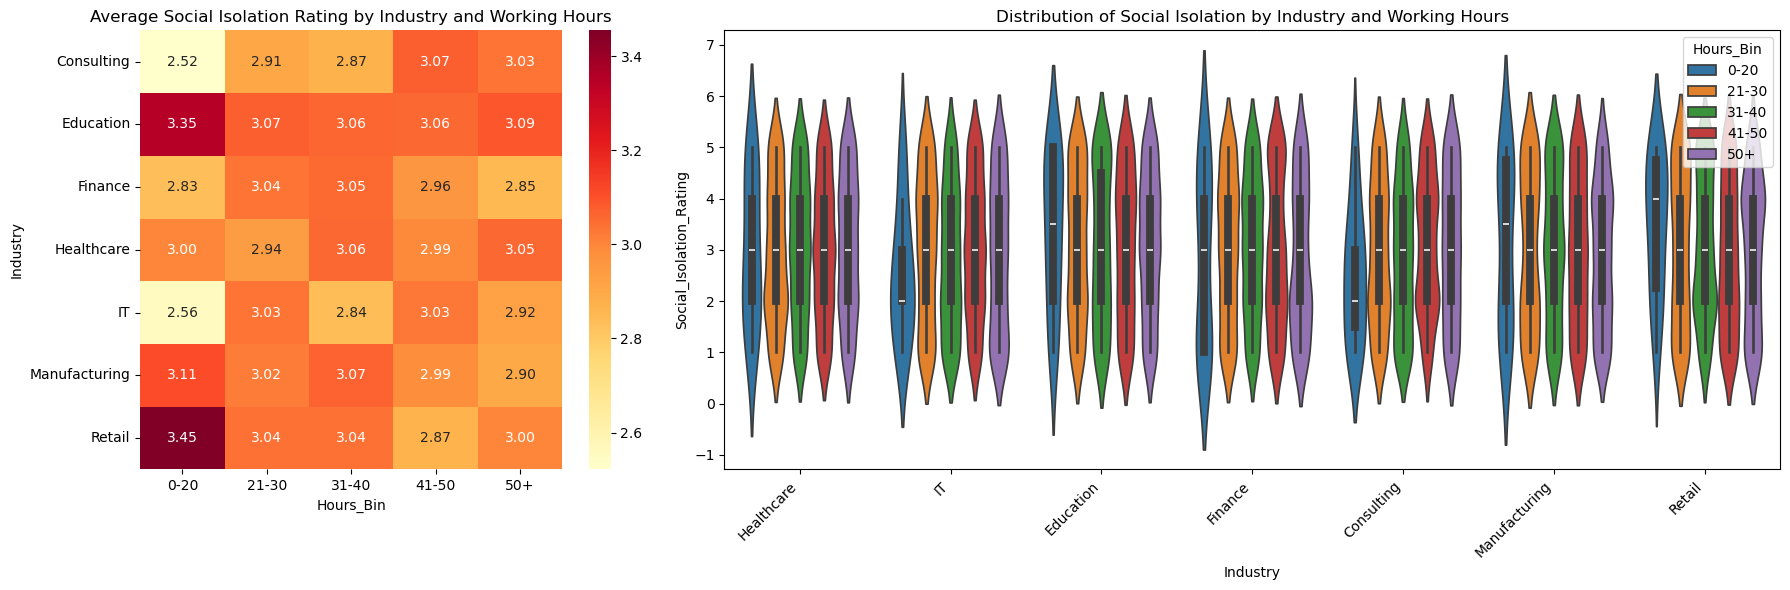

In [29]:
df['Hours_Bin'] = pd.cut(df['Hours_Worked_Per_Week'], 
                        bins=[0, 20, 30, 40, 50, 100],
                        labels=['0-20', '21-30', '31-40', '41-50', '50+'])

# df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], 
#                          labels=['0-18', '18-30', '31-45', '46-60', '61+'])


pivot_data = df.pivot_table(values='Social_Isolation_Rating',
                            index='Industry',
                            columns='Hours_Bin',
                            aggfunc='mean')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})


#heatmap
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax1)
ax1.set_title('Average Social Isolation Rating by Industry and Working Hours')

#violin
sns.violinplot(data=df, x='Industry', y='Social_Isolation_Rating', hue='Hours_Bin', ax=ax2)
ax2.set_title('Distribution of Social Isolation by Industry and Working Hours')
ax2.set_xticks(range(len(df['Industry'].unique())))

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,ha='right')

plt.tight_layout()
plt.show()


#### <span style='color:#2B9C15 '>💡 Observation </span>

<div style="border-radius:10px;border:#2B9C15  solid;padding: 15px;background-color:#F5F9D0;font-size:110%;text-align:left">

- Longer working hours do not consistently correlate with higher stress levels, as the heatmap shows relatively uniform color intensity across columns.
- The box plots shows insignificant variation in distributions, indicating a stable trend across industries for both working hours and social isolation ratings.
- The violin plots are mostly right-skewed, suggesting that most employees experience similar social isolation ratings, with a few outliers.


###  ***3.3 Question 3***

#### <span style='color:#2B9C15 '>💬 Question </span>
**Are there any significant differences in stress levels and sleep quality among employees in various industries?**

#### <span style='color:#2B9C15 '>🔎 What are the benefits of finding the answer? </span>

**Understanding the variations in stress levels and sleep quality across different industries provides in-depth information about which sectors may require targeted interventions to improve employee health and productivity.**

#### <span style='color:#2B9C15 '>📉 Data analysis ideas </span>

- We are going to analyze three columns: **'Industry', 'Stress_Level', 'Sleep_Quality'**
- Plot bar charts to visually compare the average **Stress_Level** and **Sleep_Quality** .
- Create heatmap to visualize the relationship between **Stress_Level** and  **Sleep_Quality**

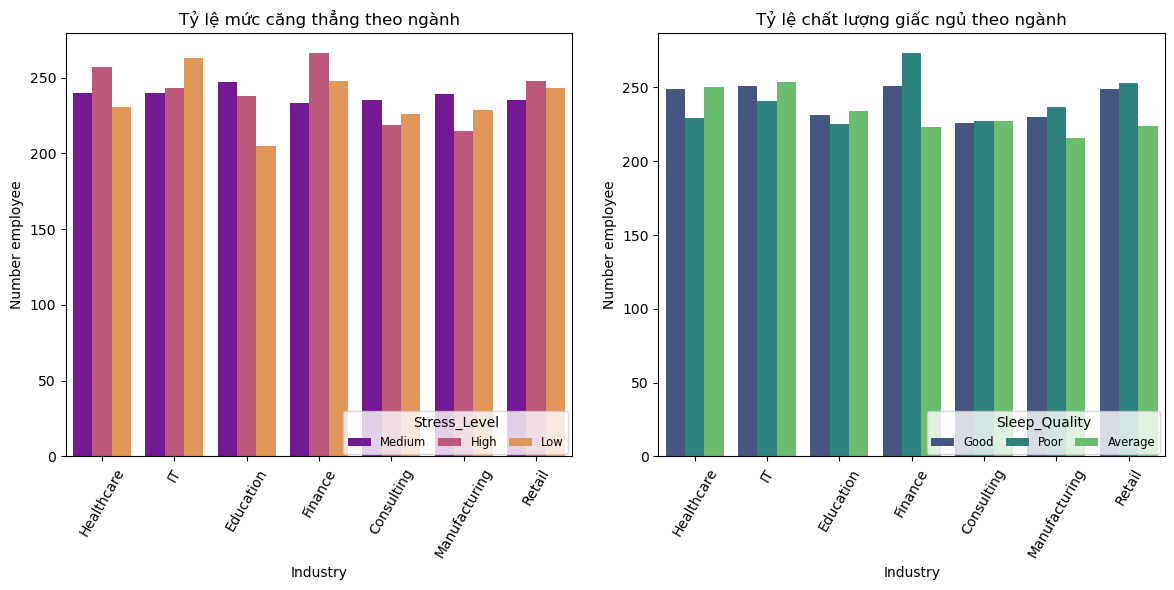

In [33]:
# code here
sns.set_palette('Set2')

# Tạo các ô con cho hai biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=False) #True -> using 1 X(number employee)

# Biểu đồ 1: Tỷ lệ mức căng thẳng theo ngành
plot1 = sns.countplot(data=df, x='Industry', hue='Stress_Level', palette='plasma', ax=axes[0])  
axes[0].set_title('Tỷ lệ mức căng thẳng theo ngành')
axes[0].set_ylabel('Number employee')
axes[0].set_xlabel('Industry')
axes[0].tick_params(axis='x', rotation=60)
axes[0].legend(title='Stress_Level', loc='upper center', bbox_to_anchor=(0.77, 0.12), ncol=3, fontsize='small', columnspacing=1, markerscale=0.8)


# Biểu đồ 2: Tỷ lệ chất lượng giấc ngủ theo ngành
plot2 = sns.countplot(data=df, x='Industry', hue='Sleep_Quality', palette='viridis', ax=axes[1])
axes[1].set_title('Tỷ lệ chất lượng giấc ngủ theo ngành')
axes[1].set_ylabel('Number employee')
axes[1].set_xlabel('Industry')
axes[1].tick_params(axis='x', rotation=60)
axes[1].legend(title='Sleep_Quality', loc='upper center', bbox_to_anchor=(0.76,0.12), ncol=3, fontsize='small', columnspacing=1, markerscale=0.8)  

plt.tight_layout()
plt.show()

#### <span style='color:#2B9C15 '>💡 Observation </span>

<div style="border-radius:10px;border:#2B9C15  solid;padding: 15px;background-color:#F5F9D0;font-size:110%;text-align:left">

- Tỷ lệ mức căng thẳng theo ngành (biểu đồ trái):

    - Ngành Finance và Healthcare có tỷ lệ nhân viên căng thẳng cao (High) chiếm ưu thế.
    - Ngành IT và Retail có tỷ lệ căng thẳng thấp (Low) cao hơn so với các ngành khác.

- Tỷ lệ chất lượng giấc ngủ theo ngành (biểu đồ phải):

    - Ngành IT và Finance có tỷ lệ giấc ngủ tốt (Good) cao nhất.
    - Ngành Healthcare có tỷ lệ giấc ngủ kém (Poor) nhiều hơn các ngành khác.

    

$\rightarrow$ **Ngành có mức căng thẳng cao thường đi kèm với giấc ngủ kém hơn, ngược lại ngành ít căng thẳng hơn có giấc ngủ tốt hơn.**

##### ***Nhắc lại*** :  
1. Ma trận tương quan 

    -Nếu r càng tiến về 1, -1: tương quan tuyến tính càng mạnh, càng chặt chẽ. Tiến về 1 là tương quan dương, tiến về -1 là tương quan âm.

    -Nếu r càng tiến về 0: tương quan tuyến tính càng yếu.

    -Nếu r = 1: tương quan tuyến tính tuyệt đối,c ác điểm biểu diễn sẽ nhập lại thành 1 đường thẳng.
    
    -Nếu r = 0: không có mối tương quan tuyến tính. Lúc này sẽ có 2 tình huống : không có một mối liên hệ nào giữa 2 biến hoặc giữa chúng có mối liên hệ phi tuyến.



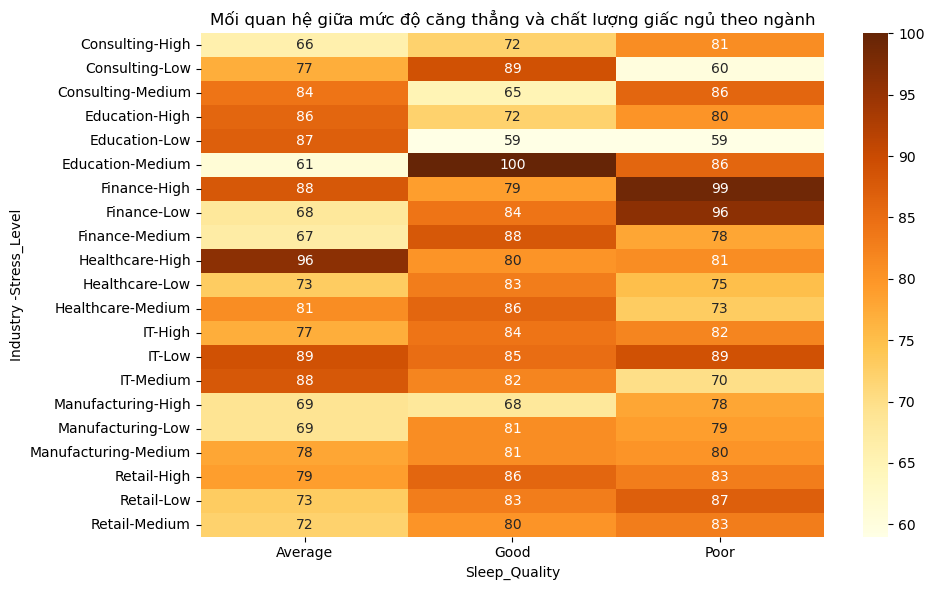

Ma trận tương quan:
                 Stress_Level_1  Sleep_Quality_1
Stress_Level_1         1.000000        -0.018505
Sleep_Quality_1       -0.018505         1.000000


In [34]:

# 1. Heatmap thể hiện mối quan hệ giữa mức độ căng thẳng và chất lượng giấc ngủ theo ngành
heatmap_data = df.groupby(['Industry', 'Stress_Level', 'Sleep_Quality']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Mối quan hệ giữa mức độ căng thẳng và chất lượng giấc ngủ theo ngành')
plt.ylabel('Industry -Stress_Level')
plt.xlabel('Sleep_Quality')
plt.tight_layout()
plt.show()

# 2. Tính toán ma trận tương quan giữa Stress_Level và Sleep_Quality
df['Stress_Level_1'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Sleep_Quality_1'] = df['Sleep_Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

correlation_matrix = df[['Stress_Level_1', 'Sleep_Quality_1']].corr()
print("Ma trận tương quan:")
print(correlation_matrix)



#### <span style='color:#2B9C15 '>💡 Nhận xét </span>

<div style="border-radius:10px;border:#2B9C15  solid;padding: 15px;background-color:#F5F9D0;font-size:110%;text-align:left">

- Với biểu đồ nhiệt:
    - Chất lượng giấc ngủ cao nhất:

        - Education-Medium với giấc ngủ trung bình đạt 100.

        - Finance-High và Healthcare-High có giấc ngủ tốt lần lượt là 99 và 96.
    - Chất lượng giấc ngủ thấp nhất:
        -Education-Low với giấc ngủ kém chỉ đạt 59.
        - Consulting-High và Manufacturing-High ở mức trung bình chỉ đạt 66 và 69.
- Với ma trận tương quan:
    - r = -0.18505 gần với 0 $\rightarrow$ **Stres_level và Sleep_quality không có quan hệ tuyến tính nào**

#### <span style='color:#2B9C15 '>💡 Tóm lại </span>

<div style="border-radius:10px;border:#2B9C15  solid;padding: 15px;background-color:#D9E5A3;font-size:110%;text-align:left">

-   Nhận xét chung về sự mâu thuẫn giữa mức căng thẳng và chất lượng giấc ngủ:

    - Mặc dù có sự mâu thuẫn giữa mức độ căng thẳng và chất lượng giấc ngủ trong các ngành, nhưng cũng có thể thấy một số quy luật chung. Ngành có mức căng thẳng cao như Finance và Healthcare thường đi kèm với chất lượng giấc ngủ kém, có thể do áp lực công việc và khối lượng công việc lớn, dẫn đến tình trạng căng thẳng kéo dài. Điều này khiến nhân viên trong những ngành này khó có được giấc ngủ chất lượng.

    - Ngược lại, các ngành ít căng thẳng như IT và Retail có tỷ lệ giấc ngủ tốt cao hơn. Điều này có thể do các ngành này có ít yêu cầu khắt khe hơn về thời gian làm việc, ít áp lực và có thể giúp người lao động duy trì một lịch trình sinh hoạt hợp lý, từ đó có giấc ngủ chất lượng hơn.

    - Sự mâu thuẫn này có thể chỉ ra rằng việc giảm mức độ căng thẳng có thể cải thiện chất lượng giấc ngủ. Tuy nhiên, cần thêm nhiều yếu tố để có thể xác định rõ mối liên hệ giữa áp lực và giấc ngủ.

<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">THE END</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">Thank you</div>